[*********************100%***********************]  1 of 1 completed


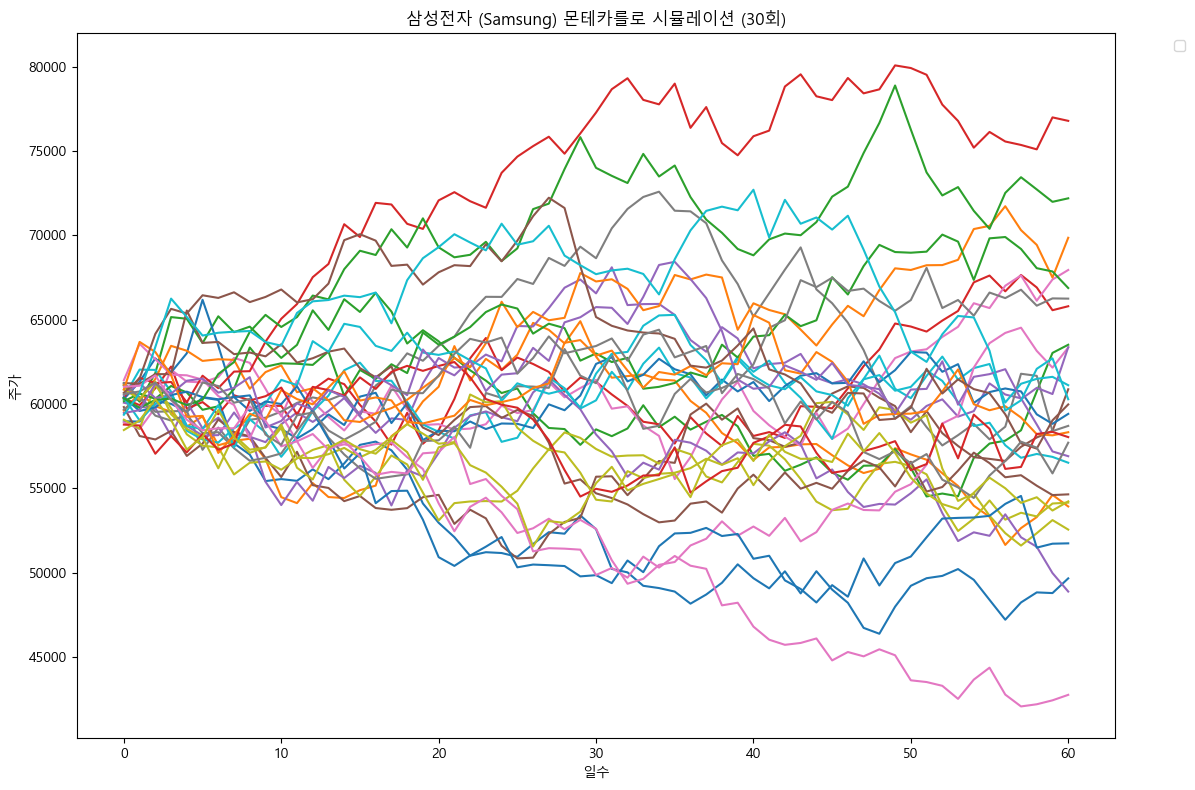

                                                   0   \
0   Ticker
005930.KS    58981.442961
Name: 2025-06...   
1   Ticker
005930.KS    58962.531443
Name: 2025-06...   
2   Ticker
005930.KS    60184.307216
Name: 2025-06...   
3   Ticker
005930.KS    60012.733015
Name: 2025-06...   
4   Ticker
005930.KS    59544.706015
Name: 2025-06...   
..                                                ...   
56  Ticker
005930.KS    47221.840675
Name: 2025-06...   
57  Ticker
005930.KS    48245.174324
Name: 2025-06...   
58  Ticker
005930.KS    48840.918644
Name: 2025-06...   
59  Ticker
005930.KS    48800.653231
Name: 2025-06...   
60  Ticker
005930.KS    49671.731082
Name: 2025-06...   

                                                   1   \
0   Ticker
005930.KS    59611.615975
Name: 2025-06...   
1   Ticker
005930.KS    60671.5665
Name: 2025-06-2...   
2   Ticker
005930.KS    59875.149474
Name: 2025-06...   
3   Ticker
005930.KS    59536.43284
Name: 2025-06-...   
4   Ticker
005930.KS    58662.

In [19]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
from matplotlib import rc
from datetime import date
from dateutil.relativedelta import relativedelta
import yfinance as yf
import pandas as pd
import numpy as np

def monte_carlo_simulation(stock_ticker='005930.KS', stock_name='ÏÇºÏÑ±Ï†ÑÏûê (Samsung)', 
                           months_back=18, num_simulations=30, simulation_days=60):
    """
    Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
    
    Parameters:
    stock_ticker (str): Ï£ºÏãù Ìã∞Ïª§ Ïã¨Î≥º
    stock_name (str): Ï£ºÏãù Ïù¥Î¶Ñ
    months_back (int): Í≥ºÍ±∞ Î™á Í∞úÏõî Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¨ÏßÄ
    num_simulations (int): ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò
    simulation_days (int): ÏãúÎÆ¨Î†àÏù¥ÏÖòÌï† ÏùºÏàò
    
    Returns:
    tuple: (ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ, ÎßàÏßÄÎßâ ÏòàÏ∏° Í∞ÄÍ≤© Î¶¨Ïä§Ìä∏)
    """
    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Í∑∏ÎûòÌîÑÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
    path = "c:/Windows/Fonts/malgun.ttf"  # Windows Í∏∞Ï§Ä 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

    # Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå Í∏∞Í∞Ñ ÏÑ§Ï†ï
    today = date.today()
    startD = today - relativedelta(months=months_back)
    endD = today

    # Ï£ºÍ∞Ä Ï†ïÎ≥¥ Îã§Ïö¥Î°úÎìú
    stock_data = yf.download(stock_ticker, startD, endD)

    # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Ï¢ÖÍ∞Ä Í∏∞Ï§Ä)
    returns = stock_data['Close'].pct_change()

    # ÏùºÍ∞Ñ ÏàòÏùµÎ•†Ïùò ÌëúÏ§ÄÌé∏Ï∞® = Î≥ÄÎèôÏÑ±
    daily_vol = returns.std()

    df = pd.DataFrame()      # ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º Ï†ÄÏû•Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    last_price = stock_data['Close'].iloc[-1]  # ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä
    last_price_list = []     # ÎßàÏßÄÎßâ ÏòàÏ∏° Í∞ÄÍ≤© Ï†ÄÏû• Î¶¨Ïä§Ìä∏

    # ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë
    for x in range(num_simulations):
        T = simulation_days  # ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏùºÏàò
        count = 0
        price_list = []

        # Ï≤´ ÎÇ† Í∞ÄÍ≤© = ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä * Î¨¥ÏûëÏúÑ ÏàòÏùµÎ•† Î∞òÏòÅ
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        # TÏùº ÎèôÏïà Í∞ÄÍ≤© ÏãúÎÆ¨Î†àÏù¥ÏÖò
        for y in range(T):
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        # ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
        df[x] = price_list
        last_price_list.append(price_list[-1])

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))
    plt.plot(df)
    plt.title(f'{stock_name} Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò ({num_simulations:,}Ìöå)')
    plt.xlabel('ÏùºÏàò')
    plt.ylabel('Ï£ºÍ∞Ä')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df, last_price_list

df, last_price_list = monte_carlo_simulation()
print(df)
print(last_price_list)


[*********************100%***********************]  1 of 1 completed


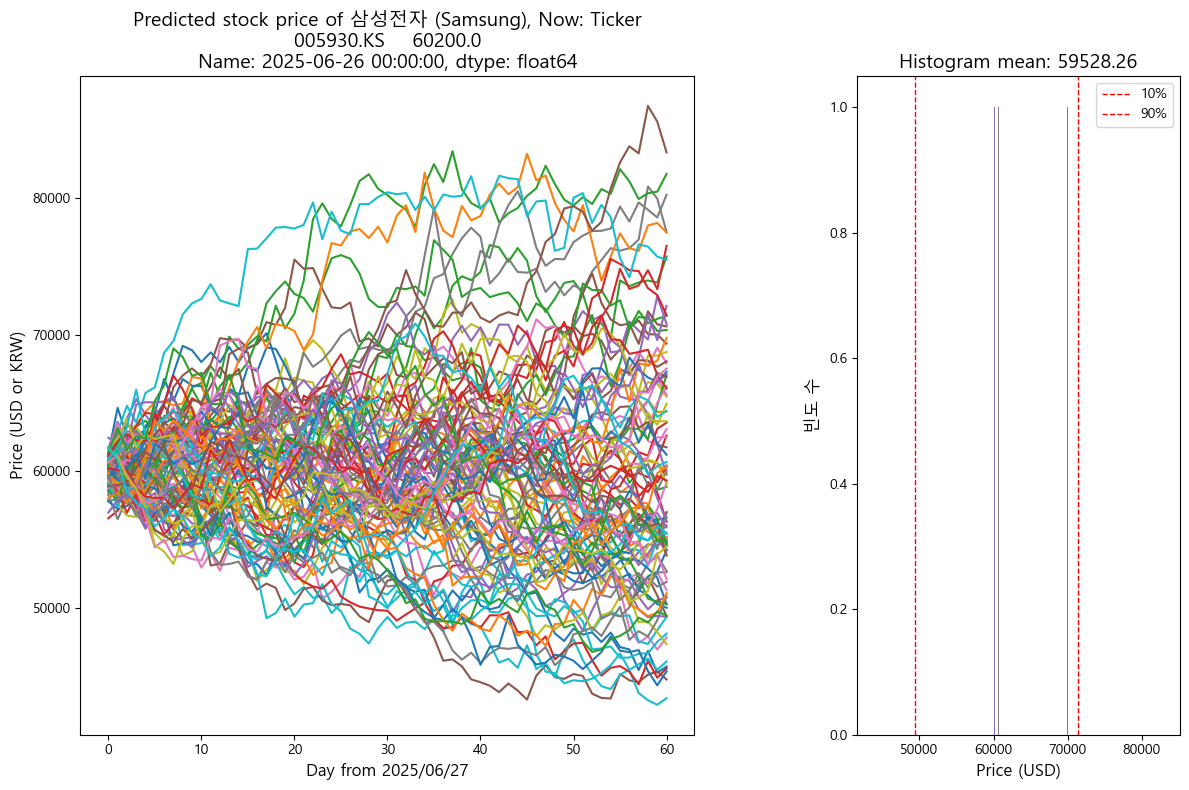

In [15]:

# Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Î∞è ÏãúÎÆ¨Î†àÏù¥ÏÖò, ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§
import yfinance as yf                     # ÏïºÌõÑ ÌååÏù¥ÎÇ∏Ïä§ÏóêÏÑú Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
import pandas as pd                       # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± Î∞è Ï≤òÎ¶¨
from datetime import date                 # Ïò§Îäò ÎÇ†Ïßú Í≥ÑÏÇ∞
from dateutil.relativedelta import relativedelta  # Ïõî Îã®ÏúÑ ÎÇ†Ïßú Í≥ÑÏÇ∞
import numpy as np                        # ÏàòÏπò Í≥ÑÏÇ∞, ÎûúÎç§ Ïàò ÏÉùÏÑ±
import matplotlib.pyplot as plt           # ÏãúÍ∞ÅÌôî
import matplotlib.font_manager as fm      # Ìè∞Ìä∏ ÏÑ§Ï†ï
from matplotlib import rc                 # matplotlib ÏÑ§Ï†ï

def main():
    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Í∑∏ÎûòÌîÑÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
    path = "c:/Windows/Fonts/malgun.ttf"  # Windows Í∏∞Ï§Ä 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

    # Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå Í∏∞Í∞Ñ ÏÑ§Ï†ï (Ïò§ÎäòÎ∂ÄÌÑ∞ 18Í∞úÏõî Ï†ÑÍπåÏßÄ)
    today = date.today()
    startD = today - relativedelta(months=18)
    endD = today

    # Ï£ºÍ∞Ä Ï†ïÎ≥¥ Îã§Ïö¥Î°úÎìú (ÏÇºÏÑ±Ï†ÑÏûê)
    stock_ticker = '005930.KS'
    stock_name = 'ÏÇºÏÑ±Ï†ÑÏûê (Samsung)'
    stock_data = yf.download(stock_ticker, startD, endD)

    # ÎπÑÌä∏ÏΩîÏù∏ Îì± Îã§Î•∏ Ï¢ÖÎ™©ÎèÑ ÏÇ¨Ïö© Í∞ÄÎä• (Ï£ºÏÑù Ï≤òÎ¶¨Îê®)
    # stock_ticker = 'BTC-USD'
    # stock_name = 'ÎπÑÌä∏ÏΩîÏù∏ (BTC/USD)'    
    # stock_data = yf.download(stock_ticker, startD, endD)

    # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Ï¢ÖÍ∞Ä Í∏∞Ï§Ä)
    returns = stock_data['Close'].pct_change()

    # ÏùºÍ∞Ñ ÏàòÏùµÎ•†Ïùò ÌëúÏ§ÄÌé∏Ï∞® = Î≥ÄÎèôÏÑ±
    daily_vol = returns.std()

    NUM_SIMULATIONS = 100  # Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò
    df = pd.DataFrame()      # ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º Ï†ÄÏû•Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    last_price = stock_data['Close'].iloc[-1]  # ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä
    last_price_list = []     # ÎßàÏßÄÎßâ ÏòàÏ∏° Í∞ÄÍ≤© Ï†ÄÏû• Î¶¨Ïä§Ìä∏

    # ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë
    for x in range(NUM_SIMULATIONS):
        T = 60  # ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏùºÏàò (ÏïΩ 3Í∞úÏõî)
        count = 0
        price_list = []

        # Ï≤´ ÎÇ† Í∞ÄÍ≤© = ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä * Î¨¥ÏûëÏúÑ ÏàòÏùµÎ•† Î∞òÏòÅ
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        # Ïù¥ÌõÑ TÏùº ÎèôÏïà Ï£ºÍ∞Ä Í≤ΩÎ°ú ÏÉùÏÑ±
        for y in range(T):
            if count == 251:  # ÏµúÎåÄ 252Ïùº (1ÎÖÑ ÏòÅÏóÖÏùº) Ï†úÌïú (Ïã§Ï†ú ÏòÅÌñ• ÏóÜÏùå)
                break
            # Ï†ÑÎÇ† Í∞ÄÍ≤© * Î¨¥ÏûëÏúÑ ÏàòÏùµÎ•† Î∞òÏòÅ
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        # Í∞Å ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó¥Î°ú Ï†ÄÏû•
        df[x] = price_list

        # ÎßàÏßÄÎßâ Í∞ÄÍ≤©Îßå Îî∞Î°ú Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû• (ÌèâÍ∑†/Î∂ÑÏúÑÏàòÏö©)
        last_price_list.append(price_list[-1])  # float Í∞íÏúºÎ°ú Ï†ÄÏû•Îê®

    # ‚ùå Ïò§Î•ò Î∞úÏÉù Í∞ÄÎä• ÏΩîÎìú: floatÏóê `.values[0]`ÏùÄ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏùå
    # tem = [ test.values[0] for test in last_price_list ] ‚Üê Ïù¥Í±¥ SeriesÏùº ÎïåÎßå Í∞ÄÎä•
    # ‚úÖ ÏïÑÎûòÏ≤òÎüº Í≥†ÏπòÎ©¥ Îê®:
    tem = last_price_list

    # ÏãúÍ∞ÅÌôî ÏãúÏûë
    plt.figure(figsize=(12, 8))  # Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

    # ÏôºÏ™Ω: ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú, Ïò§Î•∏Ï™Ω: ÌûàÏä§ÌÜ†Í∑∏Îû®
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # Î™®Îì† ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú Í∑∏ÎûòÌîÑ
    figL.plot(df)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price,2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)

    # ÎßàÏßÄÎßâ Í∞ÄÍ≤© Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
    figR.hist(tem, bins=20)

    # Î∂ÑÏúÑÏàò ÎùºÏù∏ Ï∂îÍ∞Ä (10%, 90%)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')

    # ÌèâÍ∑†ÏÑ† ÌëúÏãú
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (USD)', fontsize=12)
    figR.set_ylabel('ÎπàÎèÑ Ïàò', fontsize=12)
    figR.legend()

    # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è Í∑∏ÎûòÌîÑ Ï∂úÎ†•
    plt.tight_layout()
    plt.show()

# main Ìï®Ïàò Ïã§Ìñâ
main()

[*********************100%***********************]  1 of 1 completed


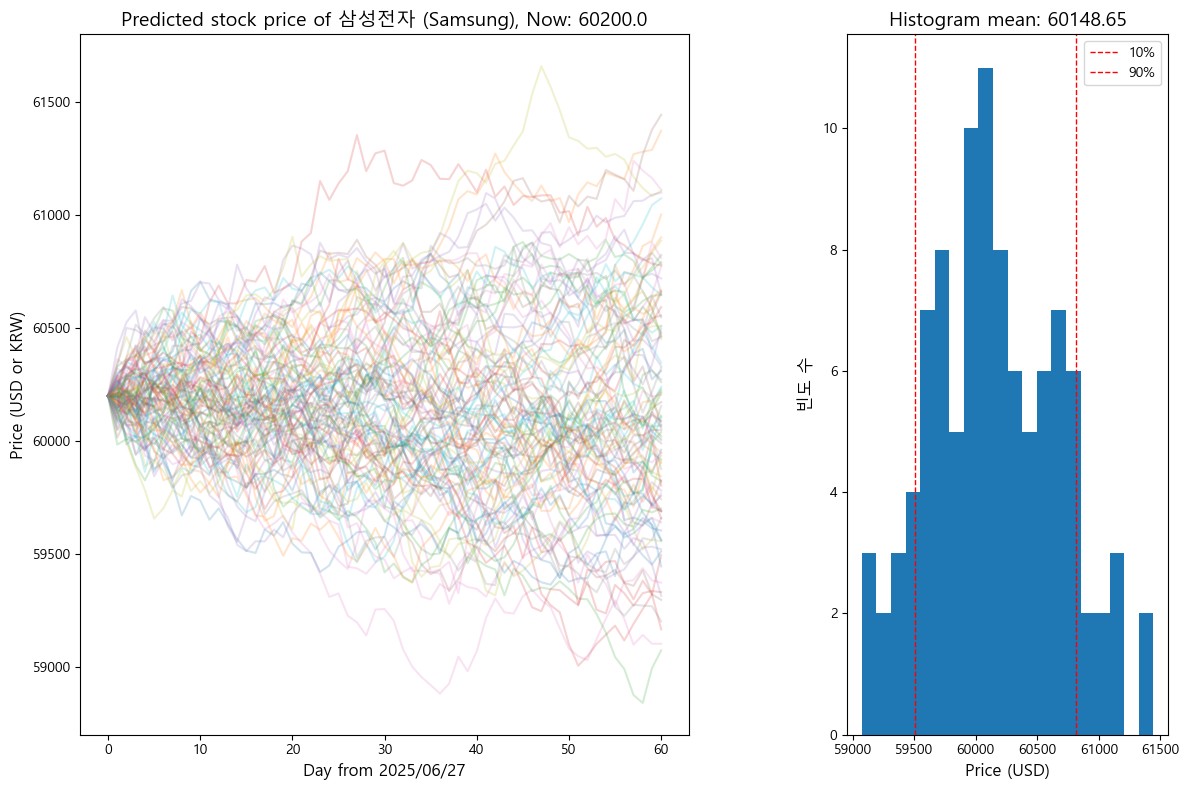

In [16]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import yfinance as yf                         # ÏïºÌõÑ ÌååÏù¥ÎÇ∏Ïä§ÏóêÏÑú Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Îäî ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd                           # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï≤òÎ¶¨Ïö©
from datetime import date                     # Ïò§Îäò ÎÇ†ÏßúÎ•º ÏñªÍ∏∞ ÏúÑÌïú Î™®Îìà
from dateutil.relativedelta import relativedelta  # ÎÇ†Ïßú Ïó∞ÏÇ∞Ïö© (ex. 18Í∞úÏõî Ï†Ñ Í≥ÑÏÇ∞)
import numpy as np                            # ÏàòÏπò Í≥ÑÏÇ∞Ïö©
import matplotlib.pyplot as plt               # Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÏö©
import matplotlib.font_manager as fm          # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏö©
from matplotlib import rc                     # Í∑∏ÎûòÌîÑÏóêÏÑú Ìè∞Ìä∏ Ï†ÅÏö©ÏùÑ ÏúÑÌïú rc ÏÑ§Ï†ï

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ìï®Ïàò
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"      # WindowsÏóêÏÑú 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)              # matplotlibÏóêÏÑú ÏÇ¨Ïö©Ìï† Ìè∞Ìä∏Î°ú ÏÑ§Ï†ï

# Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Îäî Ìï®Ïàò (Í∏∞Î≥∏: ÏµúÍ∑º 18Í∞úÏõî)
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)  # yfinanceÎ°ú Ï£ºÍ∞Ä Îã§Ïö¥Î°úÎìú

# ÌèâÍ∑† ÏàòÏùµÎ•†(mu)Í≥º Î≥ÄÎèôÏÑ±(sigma) Í≥ÑÏÇ∞
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()  # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    mu = returns.mean()                                  # ÌèâÍ∑† ÏàòÏùµÎ•†
    sigma = returns.std()                                # ÌëúÏ§ÄÌé∏Ï∞®(Î≥ÄÎèôÏÑ±)
    return mu, sigma

# Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏàòÌñâ Ìï®Ïàò
def monte_carlo_simulation(last_price, mu, sigma, T=60, num_sim=100):
    dt = 1/252  # Í±∞ÎûòÏùº Í∏∞Ï§ÄÏúºÎ°ú 1Ïùº
    price_paths = np.zeros((T+1, num_sim))     # ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú Ï†ÄÏû•Ïö© Î∞∞Ïó¥
    price_paths[0] = last_price                # ÏãúÏûë Í∞ÄÍ≤© ÏÑ∏ÌåÖ

    # Í∞Å ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú ÏÉùÏÑ±
    for t in range(1, T+1):
        z = np.random.standard_normal(num_sim)  # Ï†ïÍ∑úÎ∂ÑÌè¨ ÎûúÎç§ Í∞í
        # ÏßÄÏàò ÌôïÎ•† Î™®Îç∏Î°ú Ï£ºÍ∞Ä ÏãúÎÆ¨Î†àÏù¥ÏÖò
        price_paths[t] = price_paths[t-1] * np.exp((float(mu) - 0.5 * float(sigma)**2) * dt + float(sigma) * np.sqrt(dt) * z)
    return price_paths

# ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_simulation(price_paths, stock_name, last_price):
    today = date.today()
    plt.figure(figsize=(12, 8))  # Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

    # Ï¢åÏ∏°: ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ† Í∑∏ÎûòÌîÑ, Ïö∞Ï∏°: ÌûàÏä§ÌÜ†Í∑∏Îû®
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)   # ÏÑ†Í∑∏ÎûòÌîÑ ÏòÅÏó≠
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)   # ÌûàÏä§ÌÜ†Í∑∏Îû® ÏòÅÏó≠

    # 100Í∞úÏùò Í≤ΩÎ°úÎßå ÏÑ† Í∑∏ÎûòÌîÑÎ°ú ÌëúÏãú (Ìà¨Î™ÖÎèÑ Ï†ÅÏö©)
    figL.plot(price_paths[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price,2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)

    # ÎßàÏßÄÎßâ ÎÇ† Í∞ÄÍ≤©Îßå Ï∂îÏ∂ú
    last_prices = price_paths[-1]

    # ÌûàÏä§ÌÜ†Í∑∏Îû®: ÎßàÏßÄÎßâ Í∞ÄÍ≤© Î∂ÑÌè¨
    figR.hist(last_prices, bins=20)
    figR.axvline(np.percentile(last_prices, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(last_prices, 90), color='r', linestyle='dashed', linewidth=1, label='90%')

    # ÌèâÍ∑†ÏÑ†
    str_mean = str(round(np.mean(last_prices), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (USD)', fontsize=12)
    figR.set_ylabel('ÎπàÎèÑ Ïàò', fontsize=12)
    figR.legend()

    plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†à
    plt.show()          # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

# Î©îÏù∏ Ìï®Ïàò: Ïã§Ìñâ ÏàúÏÑú Ï†ïÏùò
def main():
    set_korean_font()                          # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
    stock_ticker = '005930.KS'                # ÏÇºÏÑ±Ï†ÑÏûê Ìã∞Ïª§
    stock_name = 'ÏÇºÏÑ±Ï†ÑÏûê (Samsung)'
    stock_data = load_stock_data(stock_ticker)  # Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    mu, sigma = calc_return_stats(stock_data)   # ÌèâÍ∑† ÏàòÏùµÎ•†, Î≥ÄÎèôÏÑ± Í≥ÑÏÇ∞
    last_price = float(stock_data['Close'].iloc[-1])  # ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä
    price_paths = monte_carlo_simulation(last_price, mu, sigma)  # ÏãúÎÆ¨Î†àÏù¥ÏÖò
    plot_simulation(price_paths, stock_name, last_price)         # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

# ÌîÑÎ°úÍ∑∏Îû® Ïã§Ìñâ
main()

[*********************100%***********************]  1 of 1 completed

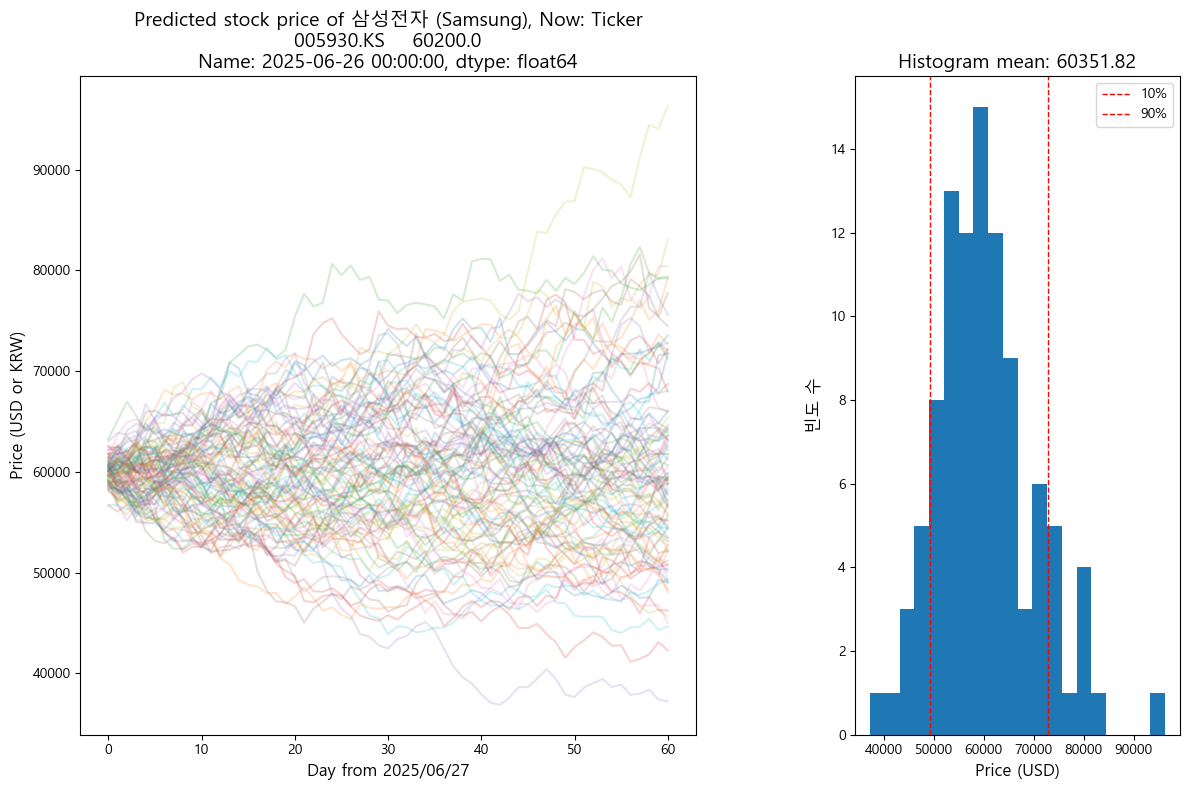

In [17]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import yfinance as yf                         # ÏïºÌõÑ ÌååÏù¥ÎÇ∏Ïä§ÏóêÏÑú Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Îäî ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd                           # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï≤òÎ¶¨Ïö©
from datetime import date                     # Ïò§Îäò ÎÇ†ÏßúÎ•º ÏñªÍ∏∞ ÏúÑÌïú Î™®Îìà
from dateutil.relativedelta import relativedelta  # ÎÇ†Ïßú Ïó∞ÏÇ∞Ïö© (ex. 18Í∞úÏõî Ï†Ñ Í≥ÑÏÇ∞)
import numpy as np                            # ÏàòÏπò Í≥ÑÏÇ∞Ïö©
import matplotlib.pyplot as plt               # Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÏö©
import matplotlib.font_manager as fm          # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏö©
from matplotlib import rc                     # Í∑∏ÎûòÌîÑÏóêÏÑú Ìè∞Ìä∏ Ï†ÅÏö©ÏùÑ ÏúÑÌïú rc ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ìï®Ïàò
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"      # WindowsÏóêÏÑú 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)              # matplotlibÏóêÏÑú ÏÇ¨Ïö©Ìï† Ìè∞Ìä∏Î°ú ÏÑ§Ï†ï

# Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Îäî Ìï®Ïàò (Í∏∞Î≥∏: ÏµúÍ∑º 18Í∞úÏõî)
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)  # yfinanceÎ°ú Ï£ºÍ∞Ä Îã§Ïö¥Î°úÎìú

# ÌèâÍ∑† ÏàòÏùµÎ•†(mu)Í≥º Î≥ÄÎèôÏÑ±(sigma) Í≥ÑÏÇ∞
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()  # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    mu = returns.mean()                                  # ÌèâÍ∑† ÏàòÏùµÎ•†
    sigma = returns.std()                                # ÌëúÏ§ÄÌé∏Ï∞®(Î≥ÄÎèôÏÑ±)
    return mu, sigma

# Í∏∞Ï°¥ Î∞©ÏãùÍ≥º Îã¨Î¶¨: ÏàòÏùµÎ•† Í∏∞Î∞ò Î∞òÎ≥µ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ìï®Ïàò
def run_simulations(last_price, daily_vol, num_simulations=100, T=60):
    """
    Í∞ÑÎã®Ìïú ÏàòÏùµÎ•† Í∏∞Î∞òÏúºÎ°ú Ï£ºÍ∞ÄÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïòÍ≥†,
    Ï†ÑÏ≤¥ Í≤ΩÎ°úÏôÄ ÎßàÏßÄÎßâ Í∞ÄÍ≤© Î¶¨Ïä§Ìä∏Î•º Î∞òÌôò
    """
    df = pd.DataFrame()
    last_price_list = []

    for x in range(num_simulations):
        count = 0
        price_list = []

        # Ï≤´ ÎÇ† Í∞ÄÍ≤© Í≥ÑÏÇ∞
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for y in range(T):
            if count == 251:
                break
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        df[x] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# Î©îÏù∏ Ìï®Ïàò: Ïã§Ìñâ ÏàúÏÑú Ï†ïÏùò
def main():
    df = pd.DataFrame()
    set_korean_font()
    stock_ticker = '005930.KS'
    stock_name = 'ÏÇºÏÑ±Ï†ÑÏûê (Samsung)'
    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]
    

    # üéØ Í∏∞Ï°¥ Î∞©Ïãù
    # price_paths = monte_carlo_simulation(last_price, mu, sigma)

    # ‚úÖ ÏÉà Î∞©Ïãù: run_simulations Ïù¥Ïö©
    price_df, last_price_list = run_simulations(last_price, sigma)  # sigma = daily_vol

    # ÏÉà Î∞©ÏãùÏóê ÎßûÍ≤å plotÎèÑ ÏßÅÏ†ë ÏàòÏ†ï
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)

    # ÎßàÏßÄÎßâ Í∞ÄÍ≤© ÌûàÏä§ÌÜ†Í∑∏Îû®
    tem = [ test.values[0] for test in last_price_list ]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (USD)', fontsize=12)
    figR.set_ylabel('ÎπàÎèÑ Ïàò', fontsize=12)
    figR.legend()

    plt.tight_layout()
    plt.show()

# ÌîÑÎ°úÍ∑∏Îû® Ïã§Ìñâ
main()

In [13]:
# import yfinance as yf
# import pandas as pd
# from datetime import date
# from dateutil.relativedelta import relativedelta
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# from matplotlib import rc
# import warnings
# warnings.filterwarnings('ignore')

# class MonteCarloSimulator:
#     def __init__(self, ticker='005930.KS', name='ÏÇºÏÑ±Ï†ÑÏûê', months=18, sims=1000, horizon=60):
#         self.ticker = ticker
#         self.name = name
#         self.months = months
#         self.num_simulations = sims
#         self.T = horizon
#         self.today = date.today()
#         self.last_price = None
#         self.mu = None
#         self.sigma = None
#         self.price_df = None
#         self.last_price_list = None

#     def set_korean_font(self):
#         path = "c:/Windows/Fonts/malgun.ttf"
#         font_name = fm.FontProperties(fname=path).get_name()
#         rc('font', family=font_name)

#     def load_stock_data(self):
#         startD = self.today - relativedelta(months=self.months)
#         endD = self.today
#         return yf.download(self.ticker, startD, endD)

#     def calc_return_stats(self, stock_data):
#         returns = stock_data['Close'].pct_change().dropna()
#         self.mu = returns.mean()
#         self.sigma = returns.std()
#         self.last_price = float(stock_data['Close'].iloc[-1])

#     def run_simulation(self):
#         df = pd.DataFrame()
#         last_price_list = []

#         for _ in range(self.num_simulations):
#             count = 0
#             price_list = []

#             price = self.last_price * (1 + np.random.normal(0, self.sigma))
#             price_list.append(price)

#             for _ in range(self.T):
#                 if count == 251:
#                     break
#                 price = price_list[count] * (1 + np.random.normal(0, self.sigma))
#                 price_list.append(price)
#                 count += 1

#             df[len(df.columns)] = price_list
#             last_price_list.append(price_list[-1])

#         self.price_df = df
#         self.last_price_list = last_price_list

#     def get_distribution_stats(self):
#         if self.last_price_list is None:
#             raise ValueError("Î®ºÏ†Ä run_simulation()ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî.")
#         mean = np.mean(self.last_price_list)
#         std = np.std(self.last_price_list)
#         return mean, std

#     def plot(self):
#         if self.price_df is None or self.last_price_list is None:
#             raise ValueError("Î®ºÏ†Ä run_simulation()ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî.")

#         self.set_korean_font()
#         plt.figure(figsize=(12, 8))
#         figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
#         figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

#         figL.plot(self.price_df.iloc[:, :100], alpha=0.2)
#         figL.set_title(f'Predicted stock price of {self.name}, Now: {round(self.last_price, 2)}', fontsize=14)
#         figL.set_xlabel(f'Day from {self.today.strftime("%Y/%m/%d")}', fontsize=12)
#         figL.set_ylabel('Price (USD or KRW)', fontsize=12)

#         figR.hist(self.last_price_list, bins=20)
#         figR.axvline(np.percentile(self.last_price_list, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
#         figR.axvline(np.percentile(self.last_price_list, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
#         mean = np.mean(self.last_price_list)
#         figR.set_title(f'Histogram mean: {round(mean, 2)}', fontsize=14)
#         figR.set_xlabel('Price (USD)', fontsize=12)
#         figR.set_ylabel('ÎπàÎèÑ Ïàò', fontsize=12)
#         figR.legend()

#         plt.tight_layout()
#         plt.show()

[*********************100%***********************]  1 of 1 completed


üìà Ï¢ÖÎ™©: 005930.KS
üìÖ Î∂ÑÏÑù Í∏∞Í∞Ñ: ÏµúÍ∑º 18Í∞úÏõî
üí∞ ÏãúÏûë Í∞ÄÍ≤©: 60200.0
üìä ÌèâÍ∑† ÏàòÏùµÎ•† (mu): Ticker
005930.KS   -0.000445
dtype: float64
üìä Î≥ÄÎèôÏÑ± (sigma): Ticker
005930.KS    0.019845
dtype: float64
üéØ ÎßàÏßÄÎßâ ÎÇ† Í∞ÄÍ≤© ÌèâÍ∑†: 59560.28
üéØ ÌëúÏ§ÄÌé∏Ï∞®: 9183.79


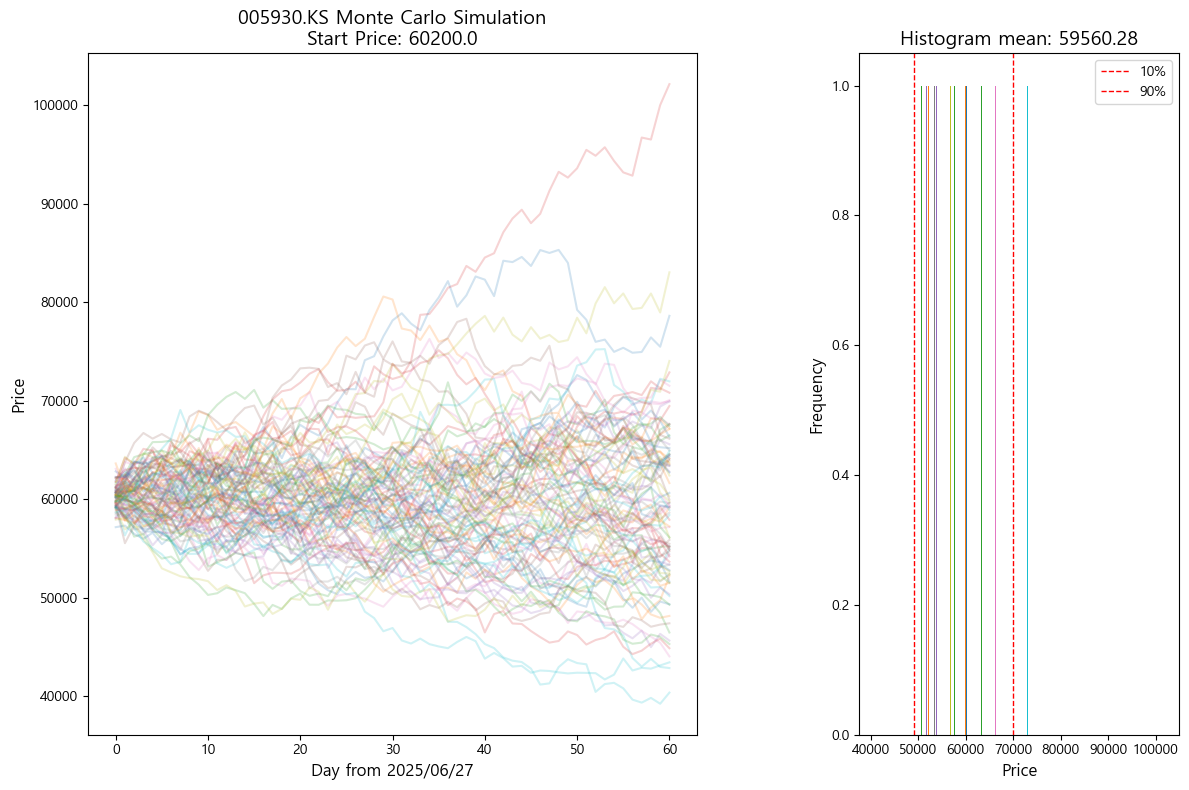

In [18]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

class StockSimulator:
    def __init__(self, ticker, months=18, num_simulations=100, T=60):
        self.ticker = ticker
        self.months = months
        self.num_simulations = num_simulations
        self.T = T
        self.today = date.today()

        self.stock_data = None
        self.mu = None
        self.sigma = None
        self.last_price = None
        self.price_df = None
        self.last_price_list = None

        self.set_korean_font()
        self.load_data()
        self.calculate_stats()
        self.run_simulation()

    def set_korean_font(self):
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = fm.FontProperties(fname=path).get_name()
        rc('font', family=font_name)

    def load_data(self):
        startD = self.today - relativedelta(months=self.months)
        endD = self.today
        self.stock_data = yf.download(self.ticker, startD, endD)
        self.last_price = float(self.stock_data['Close'].iloc[-1])

    def calculate_stats(self):
        returns = self.stock_data['Close'].pct_change().dropna()
        self.mu = returns.mean()
        self.sigma = returns.std()

    def run_simulation(self):
        df = pd.DataFrame()
        last_price_list = []

        for _ in range(self.num_simulations):
            count = 0
            price_list = []
            price = self.last_price * (1 + np.random.normal(0, self.sigma))
            price_list.append(price)

            for _ in range(self.T):
                if count == 251:
                    break
                price = price_list[count] * (1 + np.random.normal(0, self.sigma))
                price_list.append(price)
                count += 1

            df[len(df.columns)] = price_list
            last_price_list.append(price_list[-1])

        self.price_df = df
        self.last_price_list = last_price_list

    def plot_simulation(self):
        plt.figure(figsize=(12, 8))
        figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
        figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

        # Í≤ΩÎ°ú Í∑∏ÎûòÌîÑ
        figL.plot(self.price_df.iloc[:, :100], alpha=0.2)
        figL.set_title(f'{self.ticker} Monte Carlo Simulation\nStart Price: {round(self.last_price, 2)}', fontsize=14)
        figL.set_xlabel(f'Day from {self.today.strftime("%Y/%m/%d")}', fontsize=12)
        figL.set_ylabel('Price', fontsize=12)

        # ÌûàÏä§ÌÜ†Í∑∏Îû®
        figR.hist(self.last_price_list, bins=20)
        figR.axvline(np.percentile(self.last_price_list, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
        figR.axvline(np.percentile(self.last_price_list, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
        mean_value = np.mean(self.last_price_list)
        figR.set_title(f'Histogram mean: {round(mean_value, 2)}', fontsize=14)
        figR.set_xlabel('Price', fontsize=12)
        figR.set_ylabel('Frequency', fontsize=12)
        figR.legend()

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        print(f"üìà Ï¢ÖÎ™©: {self.ticker}")
        print(f"üìÖ Î∂ÑÏÑù Í∏∞Í∞Ñ: ÏµúÍ∑º {self.months}Í∞úÏõî")
        print(f"üí∞ ÏãúÏûë Í∞ÄÍ≤©: {round(self.last_price, 2)}")
        print(f"üìä ÌèâÍ∑† ÏàòÏùµÎ•† (mu): {round(self.mu, 6)}")
        print(f"üìä Î≥ÄÎèôÏÑ± (sigma): {round(self.sigma, 6)}")
        print(f"üéØ ÎßàÏßÄÎßâ ÎÇ† Í∞ÄÍ≤© ÌèâÍ∑†: {round(np.mean(self.last_price_list), 2)}")
        print(f"üéØ ÌëúÏ§ÄÌé∏Ï∞®: {round(np.std(self.last_price_list), 2)}")

# Ïã§Ìñâ ÏòàÏãú
if __name__ == "__main__":
    ticker = '005930.KS'  # Ïòà: ÏÇºÏÑ±Ï†ÑÏûê
    simulator = StockSimulator(ticker)
    simulator.print_summary()
    simulator.plot_simulation()

[*********************100%***********************]  1 of 1 completed


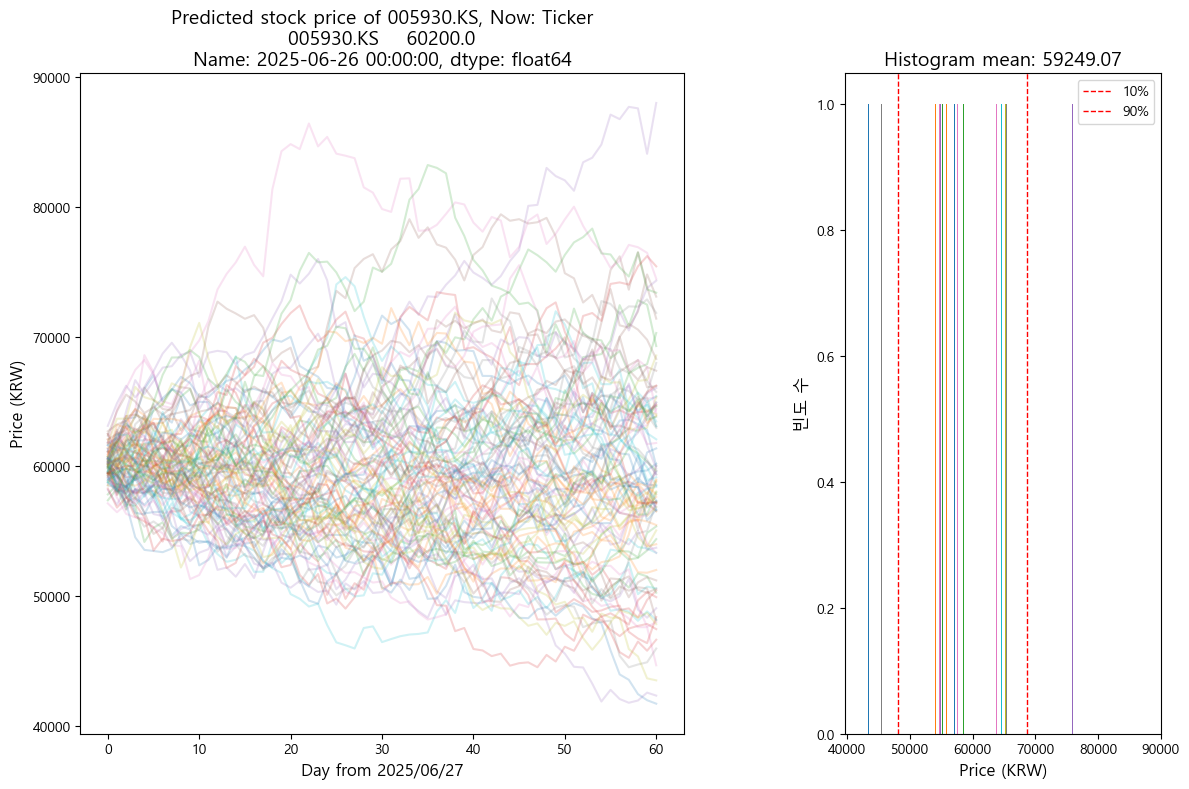


[üìâ Ìè¨ÏïÑÏÜ° Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïãú Ï£ºÍ∞Ä ÌïòÎùΩÎ•† Î∂ÑÏÑù]
- Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÌöüÏàò: 11
- ÌèâÍ∑† ÏàòÏùµÎ•†: -1.04%
- ÏµúÎåÄ ÌïòÎùΩÎ•†: -15.43%


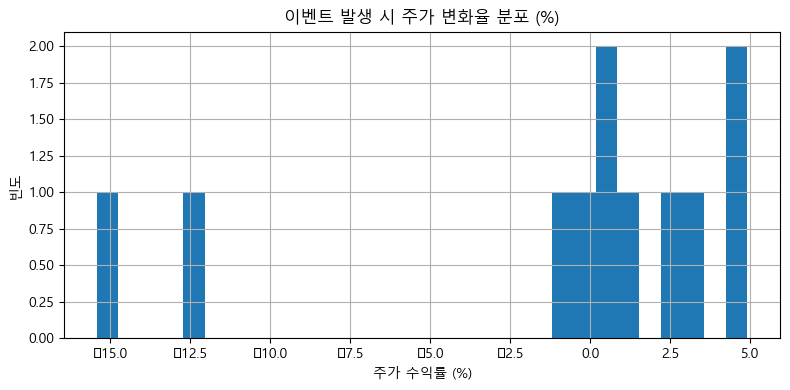

In [2]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

# ‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)

# ‚úÖ ÏàòÏùµÎ•† ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# ‚úÖ Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
def run_simulations(last_price, daily_vol, num_simulations=100, T=60):
    df = pd.DataFrame()
    last_price_list = []

    for _ in range(num_simulations):
        count = 0
        price_list = []
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for _ in range(T):
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        df[len(df.columns)] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# ‚úÖ Ìè¨ÏïÑÏÜ° Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïãú ÏàòÏùµÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò
def simulate_poisson_event_returns(last_price_list, lambda_event=0.1, daily_vol=0.05):
    event_returns = []
    event_count = 0

    for price in last_price_list:
        event = np.random.poisson(lambda_event)
        if event == 1:
            event_count += 1
            simulated_return = np.random.normal(loc=0, scale=daily_vol)
            event_returns.append(simulated_return)

    return event_count, event_returns

# ‚úÖ Î©îÏù∏ Ìï®Ïàò (Ï¢ÖÎ™©ÏΩîÎìú tickerÎ•º Ïù∏ÏûêÎ°ú Î∞õÏùå)
def main(ticker):
    set_korean_font()
    stock_ticker = ticker
    stock_name = f'{ticker}'  # Ï¢ÖÎ™©Î™ÖÏùÄ ÏΩîÎìú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]

    # ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
    price_df, last_price_list = run_simulations(last_price, sigma)

    # ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # 1) Ï£ºÍ∞Ä ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤ΩÎ°ú
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (KRW)', fontsize=12)

    # 2) ÎßàÏßÄÎßâ Í∞ÄÍ≤© ÌûàÏä§ÌÜ†Í∑∏Îû®
    tem = [price for price in last_price_list]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (KRW)', fontsize=12)
    figR.set_ylabel('ÎπàÎèÑ Ïàò', fontsize=12)
    figR.legend()
    plt.tight_layout()
    plt.show()

    # ‚úÖ Ìè¨ÏïÑÏÜ° Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïãú ÌïòÎùΩÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò
    event_count, event_returns = simulate_poisson_event_returns(tem)

    print("\n[üìâ Ìè¨ÏïÑÏÜ° Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïãú Ï£ºÍ∞Ä ÌïòÎùΩÎ•† Î∂ÑÏÑù]")
    print(f"- Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÌöüÏàò: {event_count}")
    if event_count > 0:
        print(f"- ÌèâÍ∑† ÏàòÏùµÎ•†: {np.mean(event_returns) * 100:.2f}%")
        print(f"- ÏµúÎåÄ ÌïòÎùΩÎ•†: {min(event_returns) * 100:.2f}%")

        plt.figure(figsize=(8, 4))
        plt.hist(np.array(event_returns) * 100, bins=30)
        plt.title("Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïãú Ï£ºÍ∞Ä Î≥ÄÌôîÏú® Î∂ÑÌè¨ (%)")
        plt.xlabel("Ï£ºÍ∞Ä ÏàòÏùµÎ•† (%)")
        plt.ylabel("ÎπàÎèÑ")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("- Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

# ‚úÖ Ïã§Ìñâ
if __name__ == "__main__":
    main('005930.KS')  # ‚Üê Ïó¨Í∏∞Îßå Î∞îÍæ∏Î©¥ Ï¢ÖÎ™©ÏΩîÎìú Î≥ÄÍ≤Ω Í∞ÄÎä•